# 군집화 : clustering


- 알고리즘
  - K-Mean
  - Mean Shift
  - GMM
  - DBSCAN
- 목적
  - 개체들이 주어졌을때, 개체들을 몇개의 클러스터로 나누는 과정
  - 개체들을 그룹으로 나누는 과정을 통해서, 클러스트 내부 맴버들 사이는 서로 가깝던지, 비슷하게 구성되고, 서도 다른 클러스트(군집)사이는 멀어지거나, 비슷하지 않게 된다 -> 클러스터링의 목표 -> 데이터에 정답이 없어서 진행하는 과정

# K-mean

- 가장 일반적이고, 많이 사용되는 알고리즘
- 거리 기반 알고리즘
- 군집 중심점(centroid)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법

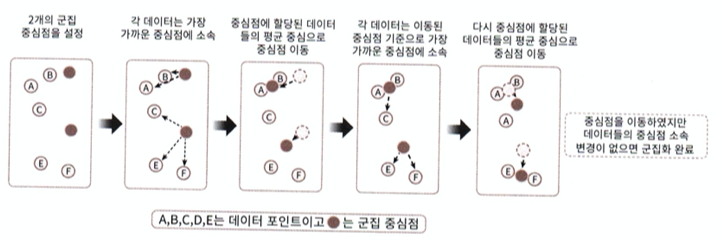

In [ ]:
from IPython.display import Image as s
'''
1. 군집 중심점을 원하는 군집화 개수(설정,iris라면 3개)만큼 임의의 위치에 놓는다
  - 랜덤으로 구성하면 운 나쁘면 아주 오래 걸릴것이다 -> 단계가 많아 질것이다
  - 실제로는, 밀도나, 평균등을 이용하여 중심점이 높을 확률을 가진 지점에 
    최초 포인트를 두는것이 빠른 처리가 되는 방법
  - 해당 위치에서 가까운 포인트들에 평균점에 위치 선택
2. 이렇게 이동된 중심점에서 가장 가까운(기준값있을수도, 계산해서 나올수도 있고) 포인트로 이동
3. 군집 중심점을 평균 지점으로 계산해서 이동 -> 반복 -> (계산, 이동, 계산, 이동,...)
  - 점점 군집들의 범위가 커진다
4. 언젠가는 군집 중심점의 이동이 없게 된다 -> 군집화가 완료되었다
'''
s('/content/drive/My Drive/202007_11_kfq/lec/ml/k-mean_0.png')

- 장점
  - 가장 많이 활용됨(쉽다, 직관적)
  - 알고리즘이 쉽고 간결하다

- 단점
  - 거리기반 알고리즘으로서, 데이터가 많으면(피처가 많으면) 군집화 정확도가 떨어질수 있다
    - 차원 축소를 통해서 차원을 줄여라!!
  - 반복 회수가 많으면 오래 걸린다
  - 몇개로 그룹화 해야 적절한지 정하기기 어렵다

In [ ]:
from sklearn.preprocessing import StandardScaler, scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [ ]:
# 데이터 준비
iris   = load_iris() 
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris_df = pd.DataFrame( iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'] )
iris_df.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [ ]:
# KMeans 파라미터
'''
n_clusters  : 군집화의 개수, 군집 중심점의 개수 -> 3
init : 군집 중심점의 좌표를 설정하는 방식, 
max_iter : 최대 반복 횟수, 군집 중심점이 이동하는 최대 회수. 이회수에 도달하면 종료
           , 이동이 없으면 종료(그전이라도), 회수에 도달해도 종료
'''
kmeans = KMeans( n_clusters=3, init='k-means++', max_iter=300, random_state=0 )

In [ ]:
# 훈련
kmeans.fit( iris_df )

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
# 각 데이터 포인트가 어던 그룹에 속했는가? 확인
kmeans.labels_, len(kmeans.labels_)

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
        0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
        0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32),
 150)

In [ ]:
kmeans.predict(iris_df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [ ]:
# 군집의 군집 중심점의 좌표 (군집개수, 피처개수)
kmeans.cluster_centers_, kmeans.cluster_centers_.shape

(array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
        [5.006     , 3.428     , 1.462     , 0.246     ],
        [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]]), (3, 4))

In [ ]:
# 얼마나 잘 군집화가 되었는가 => 정답을 모르는 상황에서 오직 데이터만 가지고
# 거리기반으로 군집화(클러스터링)을 수행하였다
# 이렇게 부류된 그룹이 실제 정답과 얼마나 일치하는지 확인
iris_df['target']  = iris.target
iris_df['cluster'] = kmeans.labels_ # 0,1,2는 그룹을 나눈 인덱스값이지 종을 표현하는것은 아니다
iris_df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1


In [ ]:
# 실제 분류값과 차이 확인
iris_df.groupby(['target','cluster'])['sepal_length'].count()
# 0번 품종음 그룹화가 잘되나
# 1,2번 품종은 데이터들이 많이 겹쳐있다 보니, 거리 기반을 그룹화면 거의 완벽하게 그룹화 되지 않는다
# 종이 섞여서 그룹화가 된다
# 분류타겟 0번종인데, 그룹이 모두 1번이므로 완벽
# 분류타겟 1번종은 48는 2번으로 군집이 잘되었으나, 2개가 오류
# 분류타겟 2번종은 36는 0번으로 군집이 잘되었으나, 14개가 오류
# -> PCA등을 이용한 차원 축소를 통해 군집화 해야 겟다!!

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64

## 차원축소 사용

- 피처가 이미 종별로 겹쳐지는 부분이 보이므로
- 차원축소를 통해서 종별로 구분지어 놓고, 군집을 진행하면, 결과가 얼마나 좋아지는 체크

In [ ]:
# PCA를 이용하여 차원을 2개로 줄이여서 
# 컬럼명  pca_1, pca_2으로 명명하여 
# iris_df를 생성 상위 2개를 출력하시오
from sklearn.decomposition import PCA
pca      = PCA(n_components=2)
iris_pca = pca.fit_transform( iris.data )
iris_pca[:2]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123]])

In [ ]:
iris_df['pca_1'] = iris_pca[:, 0]
iris_df['pca_2'] = iris_pca[:, 1]
iris_df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_1,pca_2
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001


In [ ]:
iris_df[ iris_df['cluster'] == 0 ]['pca_1'].shape

(38,)

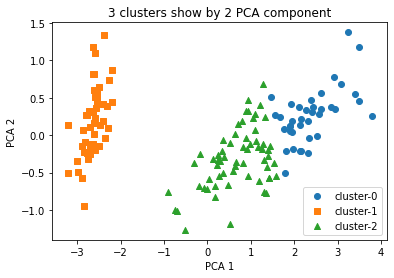

In [ ]:
# 분포도를 그려서 잘 구분이 되는지 확인
# 그릴 대상 -> 3번 그린다(군집별), x축 pca_1, y축 pca_2
# 마커 ['o','s','^'], label= cluster-0 <- 군집값 0
makers = ['o','s','^']
for idx, marker in enumerate(makers):
  #print( f'cluster-{idx}', idx, marker )
  # cluster값이 idx인 대상만 모아서 그중에 컬럼이 pca_1인 데이터  
  x = iris_df[ iris_df['cluster'] == idx ]['pca_1']
  # cluster값이 idx인 대상만 모아서 그중에 컬럼이 pca_2인 데이터
  y = iris_df[ iris_df['cluster'] == idx ]['pca_2']
  plt.scatter( x=x, y=y, marker=marker, label=f'cluster-{idx}' )

plt.legend()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 clusters show by 2 PCA component')
plt.show()

# PCA를 적용한 2개의 피처 입장에서 보면, 군집은 잘 분류되어 있다
# 그러나, 군집은 어떤 데이터를 가지고 생성했는가? iris.data (4-D)를 가지고 만든 클러스터링이다
# 절차 -> iris.data (4-D) -> PCA(차원축소) -> 2-D -> clustering(3개) -> 평가

In [ ]:
# pca 2-D -> clustering(3개) -> 평가
kmeans2  = KMeans( n_clusters=3, init='k-means++', max_iter=300, random_state=0 )

In [ ]:
# pca_1, pca_2
iris_df2 = iris_df.iloc[ :, -2:]
iris_df2.head(2),iris_df2.shape

(      pca_1     pca_2
 0 -2.684126  0.319397
 1 -2.714142 -0.177001, (150, 2))

In [ ]:
kmeans2.fit( iris_df2 )

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
iris_df2['target']  = iris.target
iris_df2['cluster'] = kmeans2.labels_
iris_df2.head(2)

,pca_1,pca_2,target,cluster
0,-2.684126,0.319397,0,0
1,-2.714142,-0.177001,0,0


In [ ]:
# iris 데이터를 이요하여 pca후 군집을 진행한 결과가 pca를 하지 않고 군집하는 하는 결과와
# 대조해보았을때 성능 향상을 볼수 없었다(단, 이 데이터가 그렇다는 의미일뿐, 다른 데이터도
# 같은 성향을 보인다고 설명할수는 없다)
iris_df2.groupby(['target','cluster'])['pca_1'].count()

target  cluster
0       0          50
1       1          47
        2           3
2       1          14
        2          36
Name: pca_1, dtype: int64

In [ ]:
iris_df.groupby(['target','cluster'])['sepal_length'].count()

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64

## 군집 평가 (Cluster Evalution)

- 군집화과가 잘 되었는가? 평가를 수행해야 한다? 
  - 몇개로 군집을 해야 잘 분류가 되는가? 
  - 지표 : 실루엣 분석(대표적인 방법)
  

## 실루엣 분석
- silhouette analysis
- 각 군집 간의 거리가 얼마나 효율적으로 분리되어 있는지를 나타낸다
  - 평가기준 : 다른 군집과의 거리는 잘 떨어있고, 군집내 포인트들을 잘 모여있는가
  - 잘 군집이 되어 있다면, 비슷한 정도의 여유 공간을 가진것이다
- 방법
  - 실루엣 계수를 기반으로 분석
    - 개별 데이터가 가지는 군집화 지표
    - 데이터가 1개는 소속 군집안에서 얼마나 가깝게 지표를 가지고, 다른 군집과의 데이터와비교를 하면 멀리 떨어저 있는지 확인

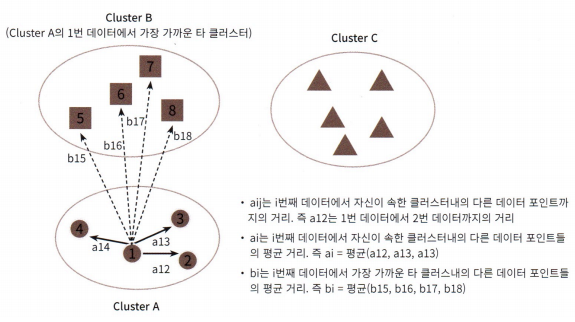

In [ ]:
s('/content/drive/My Drive/202007_11_kfq/lec/ml/cluster_실루엣_1.png')
# 군집 A의 1 번 포인트의 평균거리 ai 는 동인 군집내에 존재하는 모든 포인트들간의 거리의 평균이다
# 군집 A의 1 번 포인트의 평균거리 bi 는 
# 다른 군집(B or C)내에 존재하는 모든 포인트들간의 거리의 평균이다

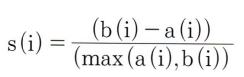

In [ ]:
'''
i : 특정 데이터 포인트
s(i) :  i 포인트의 실루엣 계수
a(i) : 같은 군집내에 i번째 포인트와 나머지 모든 포인트들 간의 거리 평균
b(i) : 같른 군집내에 i번째 포인트와 다른 군집내에 모든 포인트들 간의 거리 평균
b(i)-a(i) : i 포인트 기준으로 보는  두 군집사이의 거리
b(i)-a(i) / max(b(i)-a(i)) : 정규화를 위해서 거리의 최대값으로 나누었다
-1~1까지 나올수 있고,  1에 가까울수록 두개의 군집은 더 멀리 떨어져 있다 -> 군집화가 잘되었다
0에 가까울수록 두 군집은 가까워진다
-는 군집이 겹쳤다 -> 데이터 포인트가 다른 군집것이 할당되었다등.-> 재작업, 보정 필요!!
'''
s('/content/drive/My Drive/202007_11_kfq/lec/ml/cluster_실루엣_2.png')

## 방법,판단
  - silhouette_score()
  - 전체 실루엣 계수의 평균값은 0~1사이 존재하고, 1에 가까울수록 -> 군집이 잘됬다 평가
  - 전체 실루엣 계수의 평균과 개별 군집의 평균값의 편차가 작아야 좋다

In [ ]:
# 실루엣 계수 사용을 위한 도구
from sklearn.metrics import  silhouette_score, silhouette_samples

In [ ]:
iris_df = iris_df.iloc[ : , :4 ]
iris_df.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [ ]:
# kmeans로 군집, 군집 3개, 최대 반복횟수 300회, 난수시드 0
kmeans  = KMeans( n_clusters=3, init='k-means++', max_iter=300, random_state=0 )
kmeans.fit(iris_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
iris_df['cluster'] = kmeans.labels_
iris_df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1


In [ ]:
# iris의 개별 데이터에 실루엣계수 계산
score_samples = silhouette_samples( iris.data, iris_df['cluster']  )
score_samples.shape

(150,)

In [ ]:
score_samples[:10]

array([0.85295506, 0.81549476, 0.8293151 , 0.80501395, 0.8493016 ,
       0.74828037, 0.82165093, 0.85390505, 0.75215011, 0.825294  ])

In [ ]:
# iris_df에 추가
iris_df['silhouette_coeff'] = score_samples
iris_df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495


In [ ]:
# 모든 데이터에 평균 실루렛 계수값획득
average_score = silhouette_score( iris.data, iris_df['cluster'] )

In [ ]:
average_score
# 1에 가까우면 군집이 잘됬다
# 0.55이면 중간 정도 레벨, 성분을 확인 -> 군집별 실루엣 계수 평균

0.5528190123564091

In [ ]:
# 군집별 실루엣 계수 평균
iris_df.groupby('cluster')['silhouette_coeff'].mean()
# 0번 군집과, 2번 군집이 성능이 낮아서, 군집화가 상대적으로 잘 않되서, 전체값이 낮다

cluster
0    0.451105
1    0.798140
2    0.417320
Name: silhouette_coeff, dtype: float64

## 군집별 평균 실루엣 계수의 시각화를 통해서 군집 개수 최적화

- 원래 데이터를 가지고 군집을 몇개를 해야하는지는 알수 없다 (단, 데이터에 사전 정보를 일부 안다면, 후보군(2,3,4,5,..) 뽑을수는 있고, 이를 평가해서 선정)

In [ ]:
# 시각화 -> 실루엣계수를 면적으로표기해서 시각화
def visual_silhouette_check( cluster_list, features ):
  # 모듈 가져오기는 파이썬 코드 어디서는 사용 가능 함, 주로 코드 맨위에서 사용할뿐
  from sklearn.metrics import  silhouette_score, silhouette_samples
  from sklearn.cluster import KMeans
  import matplotlib.pyplot as plt
  import matplotlib.cm as cm
  import numpy as np
  import pandas as pd
  # 클러스 후보들 개수
  n_cols = len(cluster_list)
  # 좌표축(시각화 -> 한줄에 n_cols의 개수만큼 차트를 그린다)
  fig, axs = plt.subplots( figsize=(n_cols*5, 5), nrows=1, ncols=n_cols )

  # 군집화의 개수에 따라 처리진행
  # idx : 군집의 번호 0,1 ...
  # size: 군집의 개수(몇개로 군집화 할것인가)
  for idx, size in enumerate(cluster_list):
    # ----------------------------------------------------------------------------
    # 시각화 하기 위해서 데이터 준비
    # 1. 군집화 알고리즘 생성
    cluster_model = KMeans( n_clusters=size, max_iter=500, random_state=0 )
    # 2. 훈련-> 군집정보 추출 -> 군집화 알고리즘의 예측결과 => 어느 데이터가 어느 군집에 속한다
    cluster_label = cluster_model.fit_predict( features )
    #print( cluster_label == 0 )
    # 3. 개별 데이터의 실루엣 계수
    sil_values    = silhouette_samples( features, cluster_label )
    # 4. 군집의 평균 실루엣 계수
    sil_avg       = silhouette_score( features, cluster_label )
    # ----------------------------------------------------------------------------
    # 시각화 차트 드로잉
    # 제목
    axs[idx].set_title( f'cluster counts {size}, {round(sil_avg,3)}')
    # 라벨
    axs[idx].set_xlabel('silhouette coefficient')
    axs[idx].set_ylabel('cluster label')
    # 값의 제한 -> 모든 차트의 축의 범위가 동일 -> x,y축
    axs[idx].set_xlim( [-0.1, 1] )
    # x축의 좌표 표현 -> 실루엣 계수 0.0 ~ 1.0 : x축의 범위값은 -0.1정도 확장해서     
    # 보이는 부분이 잘 구분되게 보정
    # y축은 클러스터 군집 번호 표현 최대 0~1, 0~2, 0~3, 0~4
    axs[idx].set_ylim( [0, (size + 1)*10  ] )
    # x축은 디테일 하게 좌표를 표현
    axs[idx].set_xticks( [0, 0.2, 0.4, 0.6, 0.8, 1] )
    # ----------------------------------------------------------------------------
    # 클러스터 개수별로 영역을 그리기
    y_std_lower = 10 # 이값은 군집을 그리는 기준 좌표값 -> 군집을 그리면 계속 증가
    for i in range(size): # 0~ 0번 군집, 1번 군집, 2번 군집,...
      # 대상 군집별로 데이터를 구한다?
      # numpy의 블리언인덱싱을 사용하여 해당 군집 데이터만 추출
      i_cluster_sil_values = sil_values[cluster_label == i]
      # 정렬
      i_cluster_sil_values.sort()
      x2 = i_cluster_sil_values
      # --------------------------------------------------------------------------
      # 범위
      i_size_cluster = i_cluster_sil_values.shape[0] # 0번 군집의 데이터 개수
      y              = np.arange( y_std_lower, y_std_lower + i_size_cluster )
      x1             = 0
      color          = cm.nipy_spectral( float(i)/size )

      axs[idx].fill_betweenx( y, x1, x2, facecolor=color, edgecolor=color, alpha=0.7 )
      # 다음 군집을 그리기 위해 기준 좌표값을 증가
      y_std_lower = y_std_lower + i_size_cluster + 10
      #break
    #break
    
    # 평균값 드로잉 -> 군집의 끝 모양들이 실루엣 평균값을 넘어서야 한다
    axs[idx].axvline( x=sil_avg, color='red', linestyle='--' )
  pass

In [ ]:
from sklearn.metrics import  silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

def visual_silhouette_check( cluster_list, features ):  
  n_cols = len(cluster_list)
  fig, axs = plt.subplots( figsize=(n_cols*5, 5), nrows=1, ncols=n_cols )

  for idx, size in enumerate(cluster_list):
    cluster_model = KMeans( n_clusters=size, max_iter=500, random_state=0 )
    cluster_label = cluster_model.fit_predict( features )
    sil_values    = silhouette_samples( features, cluster_label )
    sil_avg       = silhouette_score( features, cluster_label )
    
    axs[idx].set_title( f'cluster counts {size}, {round(sil_avg,3)}')
    axs[idx].set_xlabel('silhouette coefficient')
    axs[idx].set_ylabel('cluster label')
    axs[idx].set_xlim( [-0.1, 1] )
    #axs[idx].set_ylim( [0, (size + 1)*10  ] )
    axs[idx].set_yticks([]) # 축값 초기화
    axs[idx].set_xticks( [0, 0.2, 0.4, 0.6, 0.8, 1] )
    y_std_lower   = 10

    for i in range(size):      
      i_cluster_sil_values = sil_values[cluster_label == i]      
      i_cluster_sil_values.sort()
      x2 = i_cluster_sil_values      
      i_size_cluster = i_cluster_sil_values.shape[0] # 0번 군집의 데이터 개수
      y              = np.arange( y_std_lower, y_std_lower + i_size_cluster )
      x1             = 0
      color          = cm.nipy_spectral( i/size )
      axs[idx].fill_betweenx( y, x1, x2, facecolor=color, edgecolor=color, alpha=0.7 )
      # 군집의 번호를 드로잉
      # 군집의 왼쪽, 중심부에 군집 번호를 드로잉
      axs[idx].text( -0.1/2, y_std_lower + i_size_cluster/2, str(i) )
      y_std_lower = y_std_lower + i_size_cluster + 10   
    
    axs[idx].axvline( x=sil_avg, color='red', linestyle='--' )  

In [ ]:
import matplotlib.cm as cm
# 색상을 군집별로 구분하기위해서 사용
#cm.nipy_spectral( 해당군집번호/클러스터의개수 )

In [ ]:
# 조건 부여, 데이터 생성(더미 데이터 생성)
from sklearn.datasets import make_blobs
'''
n_samples : 생성할 데이터의 개수
n_features :  피처수, 특성을 몇개, 기본값 2(x,y)
centers : 군집의 개수, 정수, 배열(군집 중심점의 좌표)
cluster_std : 생성된 군집의 표준 편차. 값을 한개만 지정 => 모든 군집에 적용, 리스트(개별군집에적용)
'''
X, y = make_blobs( n_samples=500,  n_features=2, centers=4, cluster_std=1.0,  random_state=1)

In [ ]:
# X의 데이터의 피처 2개, y 는 정답(용도는 군집과 비교시 사용:잘 군집화되었는지 체크용도)
X.shape, y.shape

((500, 2), (500,))

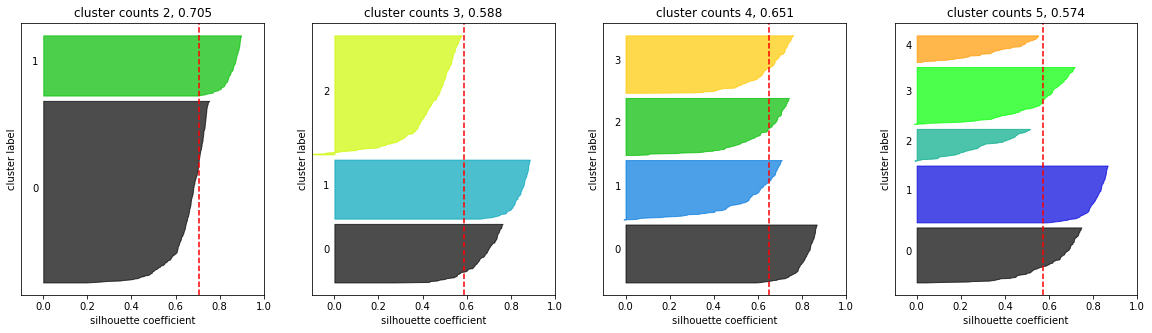

In [ ]:
# 최적의 군집개수를 구하기 위해서 후보리스트 준비
candi_clusters = [2,3,4,5] # 군집 후보군 (몇개가 가장 잘 군집화 되는 개수인가 후보들)
# 시각화
visual_silhouette_check( candi_clusters, X )
# 군집의 개수는 2개 혹은 4개가 적절하다

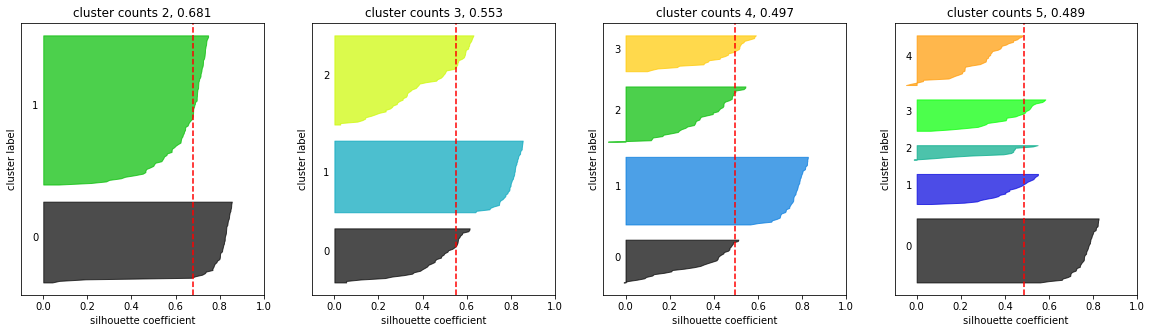

In [ ]:
# 아이리스 데이터에 대해서 몇개의 군집이 가장 성능이 좋은지 교차 검증해서 시각화
X = load_iris().data
visual_silhouette_check( candi_clusters, X )
# 아이리스 경우, 실루엣 평균값 기준에서는 군집 2개가 적합
# 군집 3개인 경우도 조건은 만족하나, 1번 군집과, 0,2번 군집간의 편차가 크다
# 실루엣 계수를 이용하여, 해당 데이터를 몇개의 군집으로 그룹화할것인지 비교 검증하는 과정

# 평균이동 (Mean Shift)

- 밀도 기반 알고리즘
- 특정 대역폭(bandwidth)을 가지고, 최초의 확률 밀도 중심에서 확률 밀도 중심이 높은쪽으로 중심이동을 하는 방식

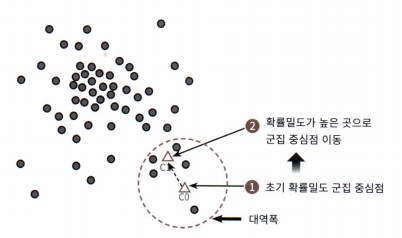

In [ ]:
s('/content/drive/My Drive/202007_11_kfq/lec/ml/cluster_meanshfit_1.png')
# 1. 데이터의 분포도를 이용하여, 군집 중심점을 찾는다
# 2. 확률 밀도 함수(probability density function)를 활용 : KDE(kernel density Estimation) 이용
# 3. 가장 집중적으로 데이터가 모여 있을 곳이 군집 중심점이 될것이다
# 4. 대역폭 : 밀도를 계산할때 경계선(원형,)

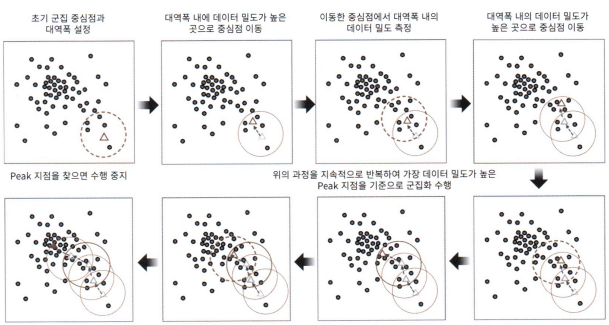

In [ ]:
s('/content/drive/My Drive/202007_11_kfq/lec/ml/cluster_meanshfit_2.png')
# 대폭을 잡고, 그 안에 있는 데이터 포인트들의 밀도를 잡고, 가장 밀도가 높을쪽으로 중심점이동
# 해당 중심점을 기준으로 다시 대역폭을 펼치고=> 반복 => 데이터의 밀도가 가장 높은 곳에 도차할때까지
# 반복회수, 대역폭 => 군집화의 품질은 무엇으로 결정된다 => 대역폭의 크기!!
# 군집의 개수를 지정할 필요가 없다!! -> 대역폭의 크기에 따라 군집의 개수가 결정된다

In [ ]:
# 더미데이터 활용
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
X.shape, y.shape

((200, 2), (200,))

In [ ]:
from sklearn.cluster import MeanShift

In [ ]:
# 알고리즘 생성
meanshift = MeanShift( bandwidth=0.9 )

In [ ]:
# 훈련 및 예측(데이터 포인트들을 군집해서 배치)
cluster_labels = meanshift.fit_predict( X )

In [ ]:
# 군집된 수는 몇개? 8개로 나왔다 -> 원본데이터를 알고 있기 때문에 
# 원래 설계된 군집은 3개였는데 8개로 나왔다=> bandwith가 작아서이다 
type(cluster_labels), np.unique(cluster_labels), len(np.unique(cluster_labels))

(numpy.ndarray, array([0, 1, 2, 3, 4, 5, 6, 7]), 8)

In [ ]:
# bandwith 값을 올려서 확인
meanshift      = MeanShift( bandwidth=(0.9 + 0.1) )
cluster_labels = meanshift.fit_predict( X )
np.unique(cluster_labels), len(np.unique(cluster_labels))
# 0.1만 대역폭을 올리니까 원래 설계된 대로 군집개수가 나왔다
# meanshift의 최적화 포인트는 대역폭 조정이다

(array([0, 1, 2]), 3)

In [ ]:
# 최적의 bandwith를 찾는 방법 -> KNN 알고리즘(최근접이웃)를 활용
# KNN(K-nearest Neighbor)
from sklearn.cluster import estimate_bandwidth

# quantile : 전체 데이터가 100건이 있엇다 만약 이값이 0.3이면
# 30건에 대해서 KNN을 적용하여 클러스터링을 수행 => 비교하여 bandwith 찾는 과정을 수행
badnwidth = estimate_bandwidth( X, quantile=0.2) # 40개 데이터를 활용하다는 의미(이 개수의 증가 비교)
badnwidth

1.443521103865421

In [ ]:
cluster_df           = pd.DataFrame( data=X, columns=['c1','c2'])
cluster_df['target'] = y
cluster_df.head(2)

,c1,c2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0


In [ ]:
# 0.2값은 조정해 가면서 성능을 점검할수 있다 -> 분류,회귀까지가서 성능을 보고 판단
best_bandwidth      = estimate_bandwidth( X, quantile=0.25)
print( best_bandwidth )
meanshift           = MeanShift( bandwidth=best_bandwidth )
cluster_labels      = meanshift.fit_predict( X )
# best_bandwidth를 적요하니까 군집의 개수가
# 0.2->4개, 0.25 -> 3개, 0.3 -> 2개가 나왔다
np.unique(cluster_labels)

1.6889636737559222


array([0, 1, 2])

In [ ]:
# 시각화
cluster_df['cluster_label'] = cluster_labels
cluster_df.head(2)

,c1,c2,target,cluster_label
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,0


In [ ]:
cx,cy = meanshift.cluster_centers_[0]

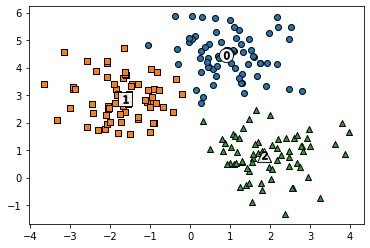

In [ ]:
# 마커
markers = ['o','s','^','x','*']
for label in np.unique(cluster_labels):
  # cluster_df중에서 군집이 label인 데이터만 추출
  label_cluster_df = cluster_df[ cluster_df['cluster_label'] == label]

  # 데이터 분포도
  plt.scatter( x=label_cluster_df['c1'], y=label_cluster_df['c2'], 
               edgecolor='k', marker=markers[label] )

  # 군집번호 드로잉 -> 데이터 포인트들중 밀도가 가장 높은지점 -> 군집 중심점
  # 군집 중심점의 좌표
  cx,cy = meanshift.cluster_centers_[ label ]
  plt.scatter( x=cx, y=cy, s=200, color='white', edgecolor='k', alpha=0.9, marker=markers[label])
  # 군집번호 드로잉 -> 숫자를 산포도의 마커로 사용
  plt.scatter( x=cx, y=cy, s=60,  color='k', edgecolor='k', alpha=0.9, marker=f'${label}$'  )

plt.show()

In [ ]:
# 실제 답과 비교
cluster_df.groupby('target')['cluster_label'].value_counts()
# 거의 완벽하게 군집구성과 실제 타겟값이 1:1로 매칭되었다 (1개는 오류가 났음)

target  cluster_label
0       0                67
1       2                67
2       1                65
        2                 1
Name: cluster_label, dtype: int64



```
- 장점
  - 유연한 군집화 가능
  - 군집의 개수를 미리 정할 필요 없다
  - 이상치가 큰 영향을 미치지 않는다 -> 밀도중심
- 단점
  - 알고리즘 수행시간이 길다
  - 대역폭에 따라 군집 영향도가 크다
- 용도
  - 컴퓨터 비전에서 많이 사용
  - 이미지, 영상 데이터서상에서 특정 개체 구분, 움직임 등에 추출할대 많이 사용(뛰어나다)
```



In [ ]:
# iris 데이터에 meanshift를 이용하여 군집을 수행한다
# 최적 badnwidth는 estimate_bandwidth함수를 이용하고, 값을 찾을때 샘플은 20%를 적용해라
# 군집의 개수룰 츨력하시오

# GMM
- Gaussian Mixture Model
- 확률 기반 알고리즘
- 데이터에 여러개의 가우시안 분포(정규분포)를 모델에 섞어서 생성된 모델을 가정하고 군집화를 수행한다
  - 가우시안 분포 : 좌우 대칭형 종 형태를 가진 연속 확률 변수

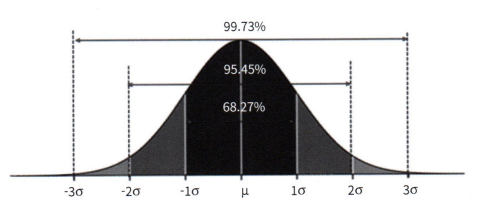

In [ ]:
s('/content/drive/My Drive/202007_11_kfq/lec/ml/cluster_gmm_1.png')
# 완벽한 좌우 대칭, 평균이 0, 표준편차 1이 데이터의 정규분포를 표준 정규분포라고 정의한다

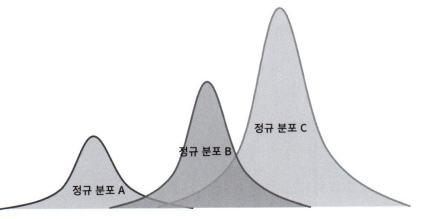

In [ ]:
s('/content/drive/My Drive/202007_11_kfq/lec/ml/cluster_gmm_2.png')

# 이런 정규분포가 3개가 있다
# 3개를 합치면

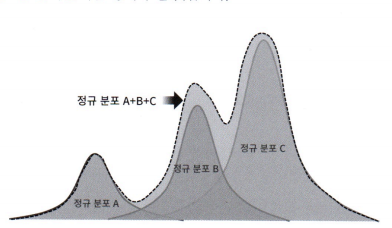

In [ ]:
s('/content/drive/My Drive/202007_11_kfq/lec/ml/cluster_gmm_3.png')
# 정규분포 A+B+C를 합친 그림

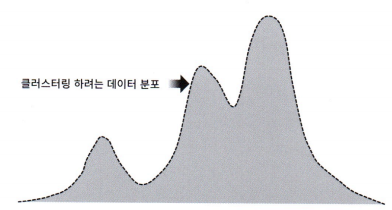

In [ ]:
s('/content/drive/My Drive/202007_11_kfq/lec/ml/cluster_gmm_4.png')
# 군집화 하고자 하는 데이터의 분포도가 이런 정규분포 3개가 걸쳐있는 형태와 같다면
# 마치 정규분포 A + B + C가 합쳐져서 만들어진 것임을 알수 있다

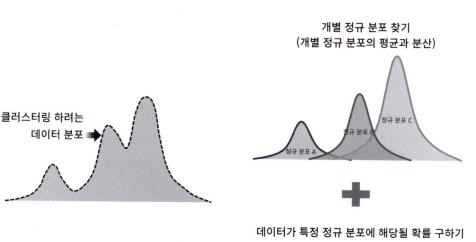

In [ ]:
s('/content/drive/My Drive/202007_11_kfq/lec/ml/cluster_gmm_5.png')
# 전체 데이터 세트는, 서로 다른 정규분포를 가진 여러개의 확룰 분포 곡선으로 구성된것이다
# 이를 정규 분포단위로 군집화 하는것 GMM이다

- 예
  - 2000개의 데이터 세트가 존재
  - 이 데이터를 구성하는 여러개의 정규분포 곡선을 추출
  - 개별 데이터가 어느 정규분포에 포함되는지 결정
  - 이런 일련의 과정을 **모수 추정**이라고 한다
  - 2가지 모수 추정의 추정 내용
    - 개별 정규 분포의 평균과 분산
    - 각 데이터가 어느 정규 분포에 해당되는지 확률

In [ ]:
# 아이리스 데이터 df로 구성
from sklearn.datasets import load_iris
# 알고리즘 2개는 서로 비교하기 위해서 포함
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [ ]:
# 데이터 로드 및 df 구성
iris    = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris_df = pd.DataFrame( data=iris.data, 
                       columns=['sepal_length','sepal_width','petal_length','petal_width'] )

In [ ]:
iris_df['target'] = iris.target
iris_df.shape

(150, 5)

In [ ]:
# 군집처리 GMM 생성
gmm = GaussianMixture( n_components=3, random_state=0)

In [ ]:
gmm.fit( iris.data )

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
gmm_cluster_labels = gmm.predict( iris.data )
gmm_cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# 실제 타겟과 군집으로 분류된 값들 사이에 얼마나 상이한지 확인
# 컬럼 추가
iris_df['gmm_cluster'] = gmm_cluster_labels

iris_result = iris_df.groupby('target')['gmm_cluster'].value_counts()
iris_result
# 전체 데이터 150개 중에 5개만 어긋났다 => 성능이 괜찮다

target  gmm_cluster
0       0              50
1       1              45
        2               5
2       2              50
Name: gmm_cluster, dtype: int64

In [ ]:
# kmeans를 이용하여 같은 내용을 구현, 군집개수 3개지정, init는 기본값적용, 반복횟수는 300회,난수0
# 알고리즘생성
kmeans                    = KMeans( n_clusters=3, random_state=0)
# 학습 - 예측
iris_df['kmeans_cluster'] = kmeans.fit_predict( iris.data )
# 평가
iris_df.groupby('target')['kmeans_cluster'].value_counts()
# 비교결과, 붓꽃 데이터는 kmeans보다 GMM이 더 효과적으로 군집처리를 한다-> 더효과적이다
# kmeans -> 데이터가 원형으로 넓게 퍼져있을대 유리하다!!
# 데이터를 먼저 산포도를 통해 그리고, 데이터의 추세, 밀도, 형태등을 판단해서 가장 적합한 
# 군집 알고리즘을 적용하면 더욱 시간을 단축할수 있다
# 아니면, 기계적으로 알고리즘 돌려가면서, 군집개수를 조정(아닌것도 있을것이다)하면서 크로스 체크하면 가장 적합한 형태가
# 나올것이다

target  kmeans_cluster
0       1                 50
1       2                 48
        0                  2
2       0                 36
        2                 14
Name: kmeans_cluster, dtype: int64

##  더미 데이터를 이용하여서 시각적으로 군집 알고리즘의 적용 차이점을 확인

- kmeans, gmm을 확인

In [ ]:
# 시각화 함수
# 군집별로 그린다, 알고리즘을 전달하면, 해당 알고리즘으로 군집하고, 
# dataframe안에는 특정 알고리즘으로 군집화된 레이블값이 전달되서 시각화된다
# 포인트, 군집중심점 그린다
# cluster_name : kmeans_labels, gmm_lables, target등 포인트들을 구분할수 있는 대상 컬럼명 지정
# cluster_obj  : 군집화 알고리즘 객체 -> 이것을 통해서 군집중심점을 구한다
def visual_cluster_plt( dataframe, cluster_name='target', isCenterShow=False, cluster_obj=None ):
  # 군집별 혹은 타겟별 고유한 목록을 추출
  unique_labels = dataframe[cluster_name].unique()  
  # 군집별 다른 마커로 그리겠다
  markers       = ['o','s','^','x','*','+']
  # 군집별로 돌면서
  for label in unique_labels:
    # 대상 군집 데이터 혹은 타겟 데이터들만 모은다
    cluster_label = dataframe[ dataframe[cluster_name] == label ]
    # 산포도로 그린다
    plt.scatter( x=cluster_label['com_1'], y=cluster_label['com_2'], s=70, edgecolor='k', 
                 marker=markers[label],                 
                 label='%s-%d' % ( 'cluster'  if isCenterShow else 'target', label ) )
    # 군집여부에 따라서 레이블 표현을 다르게 처리했다
    # 군집중심점 드로잉
    if isCenterShow:
      centers = cluster_obj.cluster_centers_[label]
      print(centers)
      plt.scatter( x=centers[0], y=centers[1], s=250, color='white',
                   alpha=0.9, edgecolor='k',  marker=markers[label])
      plt.scatter( x=centers[0], y=centers[1], s=70, color='k',
                   alpha=0.9, edgecolor='k',  marker='$%d$' % label)
    pass

  # 시각화 마무리
  plt.legend()
  plt.show()

  # for ~ :
  #   # 분포도(해당 군집별)
  #   # 군집중심점 드로잉
  #   if isCenterShow:
  #     pass
  #   pass
  # pass

visual_cluster_plt( cluster_df )

KeyError: ignored

In [ ]:
# 데이터 생성
from sklearn.datasets import make_blobs
X, y = make_blobs( n_samples=300,  n_features=2, centers=3, cluster_std=0.5, random_state=0 )
X.shape, y.shape

In [ ]:
# X에 대해서 산포도를 그리시오 (x축은 0번피처, y축 1번 피처)
plt.scatter( X[:,0], X[:,1], s=70, c=y, marker='o', edgecolor='k' )

In [ ]:
# 데이터를 전체적으로 대각선 왼쪽 상단이 높고, 우측 하단이 낮다
# 일종의 대각선 커널(행렬)을 만들어서 내적으로 통해서 전체 데이터를 대각선 형태로 조정
kernel_matix = np.array([[0.608, -0.636],[-0.408, 0.852]])
plt.scatter( kernel_matix[:,0], kernel_matix[:,1], s=70, marker='o', edgecolor='k' )

In [ ]:
# X와 kernel_matix간의 내적 수행
# (300, 2) (2, 2) : 앞의 행렬의 마지막값과, 뒤쪽 행렬의 처음값의 크기가 같아야한다
X_trans = np.dot( X, kernel_matix )
plt.scatter( X_trans[:,0], X_trans[:,1], s=70, c=y, marker='o', edgecolor='k' )

In [ ]:
# df 구성
cluster_df           = pd.DataFrame( data=X_trans, columns=['com_1','com_2']  )
cluster_df['target'] = y
# 시각화 함수 호출 -> 현재 데이터기준 target을 기준으로 시각화
visual_cluster_plt( cluster_df )

In [ ]:
# KMeans 알고리즘 적용하여 시각화
kmeans                      = KMeans( 3, random_state=0)
cluster_df['kmeans_labels'] = kmeans.fit_predict( X_trans )
visual_cluster_plt( cluster_df, cluster_name='kmeans_labels', isCenterShow=True, cluster_obj=kmeans )

In [ ]:
# GMM 알고리즘 적용하여 시각화
gmm                      = GaussianMixture( n_components=3, random_state=0)
cluster_df['gmm_labels'] = gmm.fit(X_trans).predict( X_trans )
# gmm 알고리즘의 작업 특성상 군집 중심점은 없다
# isCenterShow=False 처리했음
visual_cluster_plt( cluster_df, cluster_name='gmm_labels', isCenterShow=False, cluster_obj=gmm )
# 데이터의 분포도를 보고 적절한 알고리즘을 먼저 통찰을 통해 선택할수 있다
# kmeans는 데이터 포인트의 분포가 길게 펼쳐저 있다면, 군집 효율이 떨어진다

# DBSCAN

- Density Based Spatial Clustering of Applications with Noise
- 밀도 기반 군집화
- 데이터의 분포가 **기하학적으로 복잡한 데이터세트**인 경우

In [ ]:
s('/content/drive/My Drive/202007_11_kfq/lec/ml/cluster_DBSCAN_1.png')

In [ ]:
s('/content/drive/My Drive/202007_11_kfq/lec/ml/cluster_gbscan_1.png')

In [ ]:
s('/content/drive/My Drive/202007_11_kfq/lec/ml/cluster_gbscan_2.png')

In [ ]:
s('/content/drive/My Drive/202007_11_kfq/lec/ml/cluster_gbscan_3.png')

In [ ]:
s('/content/drive/My Drive/202007_11_kfq/lec/ml/cluster_gbscan_4.png')

In [ ]:
s('/content/drive/My Drive/202007_11_kfq/lec/ml/cluster_gbscan_5.png')

In [ ]:
s('/content/drive/My Drive/202007_11_kfq/lec/ml/cluster_gbscan_6.png')

In [ ]:
s('/content/drive/My Drive/202007_11_kfq/lec/ml/cluster_gbscan_7.png')

## 복잡한 기하학 분포를 가진 데이터를 이용하여 군집

- DBSACN가 타 알고리즘 적용 비교

In [ ]:
from sklearn.datasets import make_circles

In [ ]:
# factor : 외부 원과 내부 원의 sacle을 비율
# 데이터가 둥군 반지모양으로 외곽선을 따라 생성이 되는데,
# 내부원의 크기*2배를 하며 외부원의 모양이 된다
X, y       = make_circles(n_samples=1000, noise=0.05, random_state=0, factor=0.5)
X.shape

(1000, 2)

In [ ]:
cluster_df = pd.DataFrame( X, columns=['com_1','com_2'])
cluster_df['target'] = y
cluster_df.head(2)

,com_1,com_2,target
0,0.519781,-0.015981,1
1,-0.057719,-0.420279,1


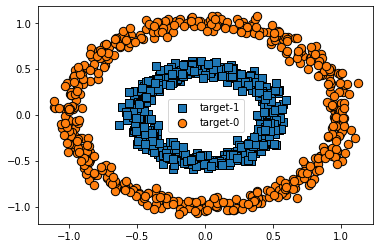

In [ ]:
visual_cluster_plt( cluster_df )
# 데이터 포인틔 분포도가 기하학적으로 생겼다
# 영역이 분리되어 있지; 않고, 속해 있거나, 등등.

[0.08538903 0.47437628]
[-0.08315616 -0.46996859]


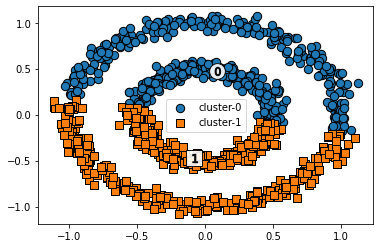

In [ ]:
# KMeans -> 군집개수 2, 반복회수 1000, 난수 0
from sklearn.cluster import KMeans
kmeans = KMeans( n_clusters=2, max_iter=1000, random_state=0 )
cluster_df['kmeans_labels'] = kmeans.fit_predict( X )
# 시각화 
visual_cluster_plt( cluster_df, 'kmeans_labels', True, kmeans )

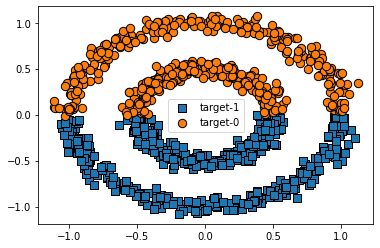

In [ ]:
# GMM -> 군집개수 2, 난수 0
from sklearn.mixture import GaussianMixture
gmm   = GaussianMixture(n_components=2, random_state=0 )
cluster_df['gmm_labels'] = gmm.fit_predict( X )
# 시각화 
visual_cluster_plt( cluster_df, 'gmm_labels', False )

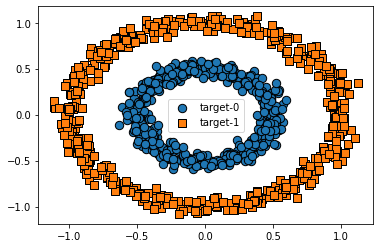

In [ ]:
# DBSCAN -> 입실론 반경 0.2, 반경내자기자신포함최소샘플수 10 
from sklearn.cluster import DBSCAN
dbscan = DBSCAN( eps=0.2,  min_samples=10 )
cluster_df['dbscan_labels'] = dbscan.fit_predict( X )
# 시각화
visual_cluster_plt( cluster_df, 'dbscan_labels', False )

# 군집화 실습

- 고객 세분화 기법
   - 고객 세그먼테이션
   - 다양한 기준으로 고객을 분류하는 기법
   - CRM, 마케팅에 중요 요소

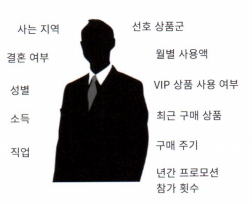

In [ ]:
s('/content/drive/My Drive/202007_11_kfq/lec/ml/cluster_cus_1.png')
# 고객 세분화 전략의  주요 목표는 타겟 마케팅이다
# 고객의 어떤 정보를 이용하여 군집화 할것이다 -> RFM 기법을 사용
# R : Recency : 가장 최근 상품 구입일로부터  오늘까지 경과된 기간(분석기준일)
# F : Frequency : 상품 구매 회수(컨텐츠 이용 회수)
# M : Monetary Value : 총 구매 금액(쇼핑몰 기준)



```
고객 데이터
경로
  /content/drive/My Drive/202007_11_kfq/lec/ml/Online Retail.xlsx
출처
  http://archive.ics.uci.edu/ml/datasets/online+retail

```



### 연구목표

- 고객 세분화
  - RFM 기법을 이용하서 고객을 군집화 한다

### 데이터 획득
- http://archive.ics.uci.edu/ml/datasets/online+retail 획득
- Online Retail.xlsx

In [229]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [230]:
# 데이터로드
retail_df = pd.read_excel( '/content/drive/My Drive/202007_11_kfq/lec/ml/Online Retail.xlsx' )
retail_df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [232]:
'''
'InvoiceNo'   : 주문번호, c로 시작하면 취소주문
'StockCode'   : 제품코드
'Description' : 제품 설명
'Quantity'    : 주문시 제품의 개수
'InvoiceDate' : 주문일자
'UnitPrice'   : 제품 단가
'CustomerID'  : 고객 번호 
'Country'     : 고객의 국적
------------------------------
'''
# R : Recency : 가장 최근 상품 구입일로부터  오늘까지 경과된 기간(분석기준일)
# F : Frequency : 상품 구매 회수(컨텐츠 이용 회수)
# M : Monetary Value : 총 구매 금액(쇼핑몰 기준)
'''
대상 고객을 정의 -> 결측 제거!!, 특정국가에 집중되어있어서,편차가 너무 크면 특정 국가로 한정검토
R : 고객의 InvoiceDate 기준으로 정렬->현재날짜로부터 가장최근에구매한날짜까지 경과한 day(일수)
F : 주문의 총개수(횟수)
M : (UnitPrice(단가) * Quantity(개수)) 주문별 총합
'''
retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

#### 대상 특정

In [233]:
# 전체 데이터에 대한 통찰
# 결측여부, 확인 -> 컬럼별로 확인하고 싶다, 데이터의대한 정보를 보고 싶다
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [234]:
# info()를 통해서 일부 결측치가 확인되었다 => 대상을 특정
retail_df.shape

(541909, 8)

### 데이터 준비
- 1. 대상이 되는 데이터를 추출
- 2. RFM에 맞게끔 컬럼을 구성한다
- 3. 군집화 구현

#### 대상이 되는 데이터를 추출

In [240]:
# 대상이 되는 데이터를 추출 -> 데이터 정제
retail_df = retail_df[ retail_df['Quantity']  > 0  ] # 주문 수량이 0개 이상
retail_df = retail_df[ retail_df['UnitPrice'] > 0  ] # 제품 단가가 0 이상
retail_df = retail_df[ retail_df['CustomerID'].notnull() ] # 데이터가 존재하는것만 남긴다
retail_df.shape
# 데이터가 대략 16만개 정도 정제되었다

(354321, 8)

In [241]:
# 컬럼별로 확인 -> 모든 컬럼에서 결측 제거됨
retail_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [242]:
# 고객 국적 검토
retail_df['Country'].value_counts()[:10]
# United Kingdom (영국)의 고객 비율이 압도적이다 -> 
# 영국 고객만 대상으로 처리하겟다(설정)

United Kingdom    354321
Name: Country, dtype: int64

In [243]:
retail_df = retail_df[ retail_df['Country'] == 'United Kingdom']
retail_df.shape
# 354321개 데이터

(354321, 8)

#### RFM에 맞게끔 컬럼을 구성한다

In [246]:
'''
'InvoiceNo'   : 주문번호, c로 시작하면 취소주문
'StockCode'   : 제품코드
'Description' : 제품 설명
'Quantity'    : 주문시 제품의 개수
'InvoiceDate' : 주문일자
'UnitPrice'   : 제품 단가
'CustomerID'  : 고객 번호 
'Country'     : 고객의 국적
'''
# amount = 제품수량 * 제품단가 => 주문 1개에 대한 구매비용
retail_df['amount']     = retail_df['Quantity']  * retail_df['UnitPrice'] 
# 고객 아이디는 정수 수치로 저장
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

In [247]:
retail_df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [252]:
# 고개별로 총 구매금액을 합산해서 정렬해서 상위 5개 출력
retail_df.groupby('CustomerID')['amount'].sum().sort_values(ascending=False)[:10]
# 상위 3명의 아이디가 주문총액의 비중이 크다 -> 몇몇고객이 큰 주문금액을 가지고 있다
# 이 데이터에는 단체 주문이 있엇다 => 3명의 고객이 주문금액이 큰 이유!!

CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
12346     77183.60
16684     66653.56
14096     65164.79
13694     65039.62
15311     60767.90
Name: amount, dtype: float64

In [253]:
retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'amount'],
      dtype='object')

In [254]:
# RFM에 해당되는 컬럼 준비
operation = {
    # 대상컬럼 : 처리함수
    'InvoiceDate':'max',  # R
    'InvoiceNo':'count',  # F : c로 시작하는 취소주문은 배제
    'amount':'sum'        # M
}
cus_df = retail_df.groupby('CustomerID').agg( operation )
cus_df.head(2)

,InvoiceDate,InvoiceNo,amount
CustomerID,,,
12346,2011-01-18 10:01:00,1,77183.60
12747,2011-12-07 14:34:00,103,4196.01


###  데이터분석 (생략)

###  모델 구축 (생략)

###  시스템 통합 (생략)